In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=2)

In [49]:
file = 'houses.csv'

In [50]:
# load dataset
df = pd.read_csv(f'data/{file}')
print(df.shape)
to_predict = df.columns[-1]

# drop the rows with missing values
df = df.fillna(df.mean(numeric_only=True))

target = df[[to_predict]]
predictors = df.drop(to_predict, axis=1).select_dtypes(exclude=object)

X_train, y_train = predictors.values, target.values.flatten()

(100, 5)


In [51]:
print(X_train.shape)
print(y_train.shape)

(100, 4)
(100,)


In [52]:
# scale/normalize data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f'Peak to peak range by column in Raw Data        X: {np.ptp(X_train, axis=0)}')
print(f'Peak to peak range by column in Normalized Data X: {np.ptp(X_norm, axis=0)}')

Peak to peak range by column in Raw Data        X: [2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to peak range by column in Normalized Data X: [5.84 6.13 2.06 3.68]


In [53]:
# create and fit the regression model
model = SGDRegressor(max_iter=1000)
model.fit(X_norm, y_train)

print(f'number of iterations completed: {model.n_iter_}, number of weight updates: {model.t_}')

number of iterations completed: 101, number of weight updates: 10101.0


In [54]:
# view model parameters
b_norm = model.intercept_
w_norm = model.coef_

print(f'model parameters: w: {w_norm}, b: {b_norm}')

model parameters: w: [109.71 -20.97 -32.11 -37.96], b: [362.28]


In [55]:
# evaluate model accuracy
y_pred = model.predict(X_norm)
print(f'accuracy: {model.score(X_norm, y_train)*100:0.2f}%%')

accuracy: 95.94%%


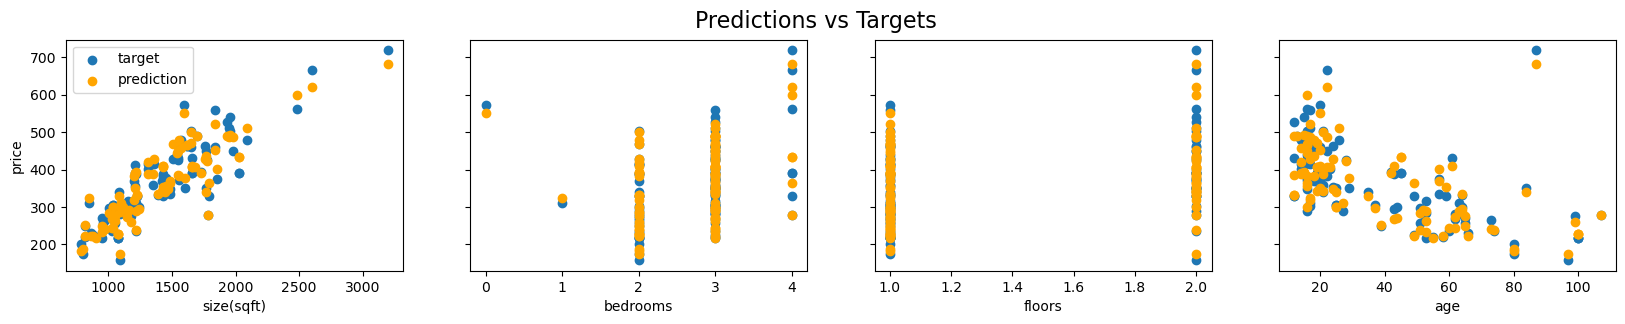

In [56]:
# plot predictions and targets vs original features
y_pred = model.predict(X_norm)

fig, ax = plt.subplots(1, X_train.shape[1], figsize=(20,3), sharey=True)
if X_train.shape[1] == 1: ax = [ax]
for i in range(X_train.shape[1]):
  ax[i].scatter(X_train[:,i], y_train, label='target')
  ax[i].set_xlabel(predictors.columns[i])
  ax[i].scatter(X_train[:,i], y_pred, color = 'orange', label='prediction')
ax[0].set_ylabel(target.columns[0])
ax[0].legend()

fig.suptitle('Predictions vs Targets', fontsize=16)
plt.show()